In [1]:
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import g4root_to_df
from root_pandas import read_root
import pandas as pd
from mu2e.mu2eplots import mu2e_plot3d_ptrap
from mu2e.mu2eplots import mu2e_plot3d_ptrap_traj
from mu2e.mu2eplots import mu2e_plot3d_ptrap_anim
import mu2e.mu2eplots as mplt
import six.moves.cPickle as pkl
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
mu2e_data_path = '/Volumes/DataDump/Mu2E/'
from skhep.visual import MplPlotter as splt
from matplotlib.colors import LogNorm
pd.set_option("display.max_columns",50)
from IPython.display import display, HTML

Welcome to JupyROOT 6.12/06


<IPython.core.display.Javascript object>

In [2]:
# Get pions, make a subset df of matching pions and muons

#df_ntpart_s1, _, _ = g4root_to_df(mu2e_data_path+'pion-st-full-Mau13/run1/nts.bpollack.pions_Mau13_stage1_vd.v656.combined',
#do_basic_modifications=True, trees=['part'])
#df_ntpart_s1, df_nttvd_s1, _ = g4root_to_df(mu2e_data_path+'pion-st-Mau13/run4/nts.bpollack.pions_Mau13_stage1_vd.v656.000001_00000319',
#df_ntpart_s1, df_nttvd_s1, _ = g4root_to_df(mu2e_data_path+'pion-st-cd3-Mau13/run1/nts.bpollack.pions_Mau13_stage1_vd.v656.000001_00001145',
#df_ntpart_s1.set_index(['run', 'subrun', 'evt'], inplace=True)

#df_ntpart_s2, df_nttvd_s2, _ = g4root_to_df(mu2e_data_path+'pion-st-Mau13-s2/run1/nts.bpollack.pions_Mau13_stage2_vd.v656.combined',
df_ntpart, _, _ = g4root_to_df(mu2e_data_path+'pion-st-full-Mau13-s2/nts.bpollack.pions_Mau13_stage2_vd.v656.resample_combined',
do_basic_modifications=True, trees=['part'])
df_ntpart.set_index(['run', 'subrun', 'evt', 'job'], inplace=True)
#df_nttvd.set_index(['run', 'subrun', 'evt', 'job'], inplace=True)


In [ ]:
df_skim = pd.read_hdf(mu2e_data_path+'pion-st-full-Mau13/pion_skim.h5', 'df')

In [ ]:
#df_ntpart_s1, _, _ = g4root_to_df(mu2e_data_path+'pion-st-full-Mau13/run3b/nts.bpollack.pions_Mau13_stage1_vd.v656.combined',
#do_basic_modifications=True, trees=['part'])
#df_ntpart_s1.set_index(['run', 'subrun', 'evt'], inplace=True)
#df_nttvd_s1.set_index(['run', 'subrun', 'evt'], inplace=True)

In [ ]:
df_skim.shape

In [ ]:
golden_index.shape

In [ ]:
df_skim.loc[golden_index].w.describe()

In [ ]:
def calc_weight(p, pz):
    cz = pz/p
    p1beg = 90
    p1end = 120
    bp1 = 0.234
    p1Norm = bp1/(np.exp(-bp1*p1beg) - np.exp(-bp1*p1end))
    
    csMax = 0.869
    acs =  7.722
    bcs = -5.956
    ccs =  6.414
    csNorm = 0.0161771
    
    mom_weight = p1Norm*np.exp(-bp1*p)
    
    cz_weight = csNorm*np.exp(acs*cz+bcs*cz**2+ccs*cz**3)
    
    return mom_weight*cz_weight

To calc prob of going from p>90, 0<cosz<0.82 to a starting S2 muon, take s1 (6e8 events).  Events were gen flat with -1<cz<1 and 55<p<120.  so df_skim.shape[0]/6e8*(0.869/2)*(30/65) = 0.21

In [ ]:
df_ntpart.shape

In [ ]:
df_ntpart.query('tstop>460').shape

In [ ]:
#df_skim_6 = df_ntpart_s1.query('parent_pdg<0 and z>8000 and parent_p>90 and 0<parent_pz/parent_p<0.869')

In [ ]:
#df_skim_6.head()

In [ ]:
#df_pion_skim = pd.concat([df_skim_1, df_skim_2, df_skim_3, df_skim_4, df_skim_5, df_skim_6])

In [ ]:
#df_pion_skim.to_hdf(mu2e_data_path+'pion-st-full-Mau13/pion_skim.h5', 'df')

In [ ]:
df_skim.shape

In [ ]:
df_skim['w'] = calc_weight(df_skim.parent_p, df_skim.parent_pz)


In [ ]:
df_skim.w.sum()/df_skim.shape[0]

In [ ]:
_ = splt.hist(df_skim.parent_p)
plt.title('pion momentum')
plt.figure()
_ = splt.hist(df_skim.parent_pz/df_skim.parent_p)
plt.title('pion cos(z)')

In [ ]:
_ = splt.hist(df_skim.loc[golden_index].parent_p)
plt.title('pion momentum')
plt.figure()
_ = splt.hist(df_skim.loc[golden_index].parent_pz/df_skim.loc[golden_index].parent_p)
plt.title('pion cos(z)')

In [ ]:
store_xray = pd.HDFStore(mu2e_data_path+'G4ParticleSim/low_e_ele_0T_v580.h5')
df_xray = store_xray.df_ntpart
store_xray.close()

In [5]:
golden_index = pd.read_pickle('/Users/brianpollack/Coding/Mu2E_Extras/datafiles/golden_index.pkl')

In [6]:
s2_final_index = df_ntpart.reset_index('job').index.intersection(golden_index)

In [7]:
df_ntpart_bad = df_ntpart.reset_index('job').loc[s2_final_index]

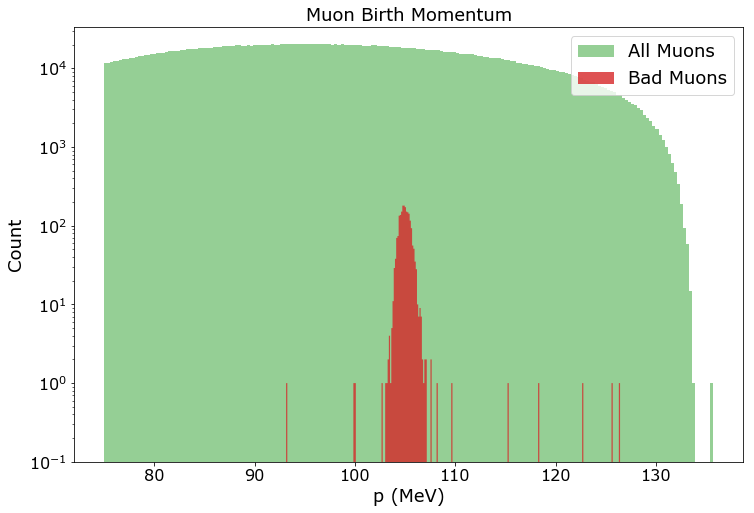

In [20]:
splt.hist(df_ntpart.query('pdg==11').parent_p,  label='All Muons', log=True, color='C2')
splt.hist(df_ntpart_bad.query('pdg==11').parent_p,  label='Bad Muons', log=True, alpha=0.8, color='C3')
#splt.hist(df_ntpart.query('pdg==11').reset_index('job').loc[s2_final_index].parent_pz, bins=65, range=(-130,130), label='pz')
#splt.hist(df_ntpart.query('pdg==11').reset_index('job').loc[s2_final_index].parent_px, bins=65, range=(-130,130), label='px')
#splt.hist(df_ntpart.query('pdg==11').reset_index('job').loc[s2_final_index].parent_py, bins=65, range=(-130,130), label='py')
plt.title('Muon Birth Momentum')
plt.xlabel('p (MeV)')
plt.ylabel('Count')
plt.legend()
plt.savefig('plots_tmp/muon_s3_birth_mom.pdf')

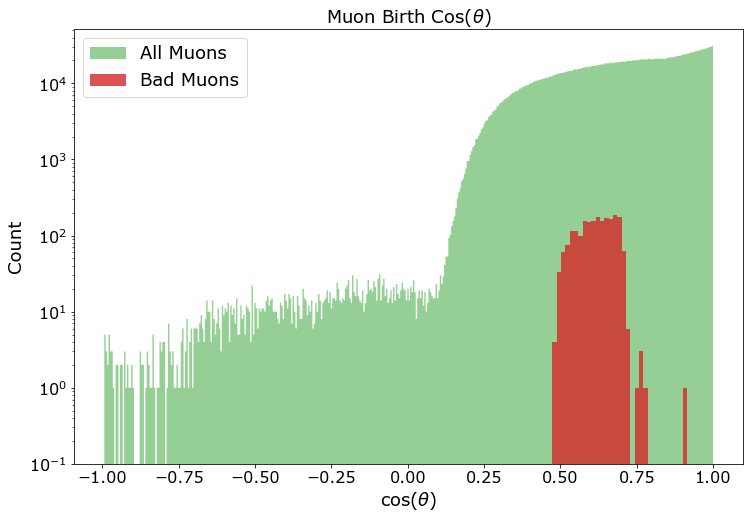

In [8]:
splt.hist(df_ntpart.query('pdg==11').parent_pz/df_ntpart.query('pdg==11').parent_p, label='All Muons', log=True, color='C2')
splt.hist(df_ntpart_bad.query('pdg==11').parent_pz/df_ntpart_bad.query('pdg==11').parent_p, label='Bad Muons', log=True, alpha=0.8, color='C3')
plt.title(r'Muon Birth Cos($\theta$)')
plt.xlabel(r'cos($\theta$)')
plt.ylabel('Count')
plt.legend(loc=2)
plt.savefig('plots_tmp/muon_s3_birth_cosz.pdf')

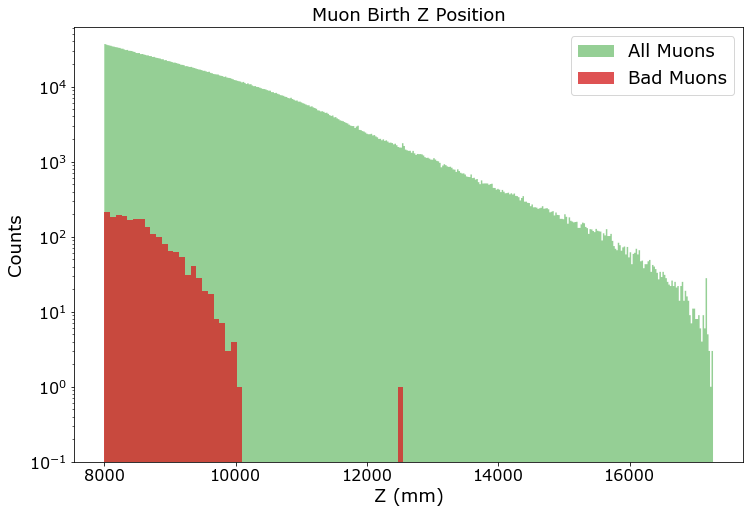

In [22]:
splt.hist(df_ntpart.query('pdg==11').parent_z, label='All Muons', log=True, color='C2')
splt.hist(df_ntpart_bad.query('pdg==11').parent_z, label='Bad Muons', log=True, color='C3', alpha=0.8)
plt.title('Muon Birth Z Position')
plt.xlabel('Z (mm)')
plt.ylabel('Counts')
plt.legend()
plt.savefig('plots_tmp/muon_s3_birth_z.pdf')

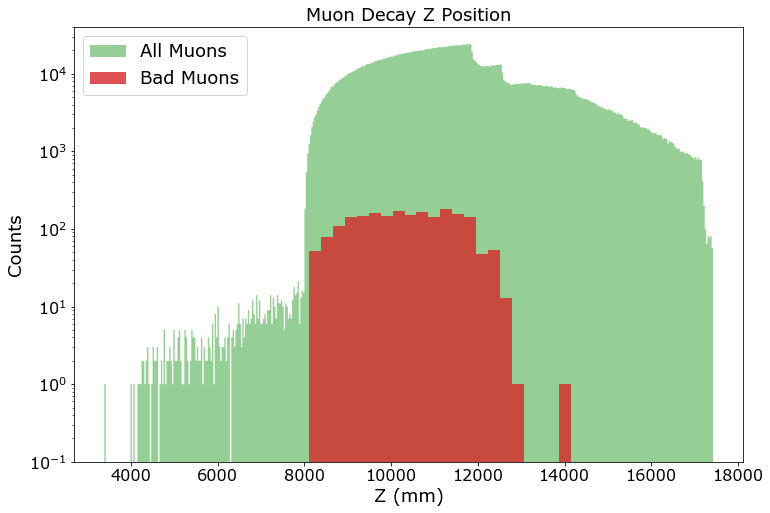

In [23]:
splt.hist(df_ntpart.query('pdg==11').z, label='All Muons', log=True, color='C2')
splt.hist(df_ntpart_bad.query('pdg==11').z, label='Bad Muons', log=True, color='C3', alpha=0.8)
plt.title('Muon Decay Z Position')
plt.xlabel('Z (mm)')
plt.ylabel('Counts')
plt.legend(loc=2)
plt.savefig('plots_tmp/muon_s3_decay_z.pdf')

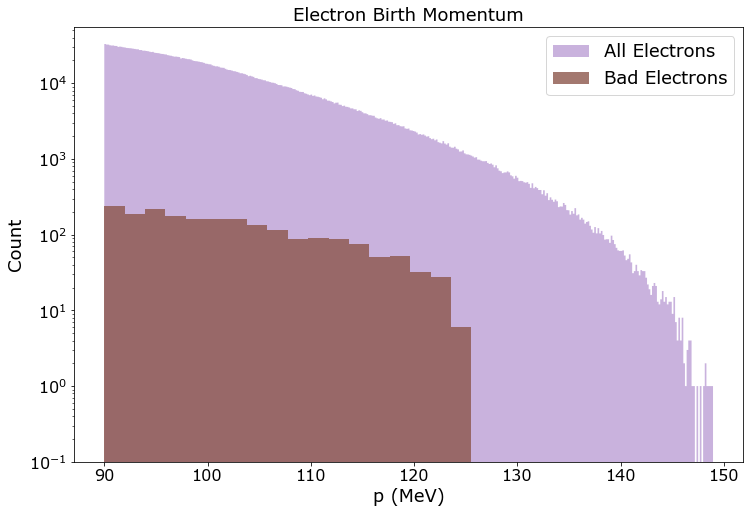

In [24]:
splt.hist(df_ntpart.query('pdg==11').p,  label='All Electrons', log=True, color='C4')
splt.hist(df_ntpart_bad.query('pdg==11').p,  label='Bad Electrons', log=True, alpha=0.8, color='C5')
#splt.hist(df_ntpart.query('pdg==11').reset_index('job').loc[s2_final_index].parent_pz, bins=65, range=(-130,130), label='pz')
#splt.hist(df_ntpart.query('pdg==11').reset_index('job').loc[s2_final_index].parent_px, bins=65, range=(-130,130), label='px')
#splt.hist(df_ntpart.query('pdg==11').reset_index('job').loc[s2_final_index].parent_py, bins=65, range=(-130,130), label='py')
plt.title('Electron Birth Momentum')
plt.xlabel('p (MeV)')
plt.ylabel('Count')
plt.legend()
plt.savefig('plots_tmp/electron_s3_birth_mom.pdf')

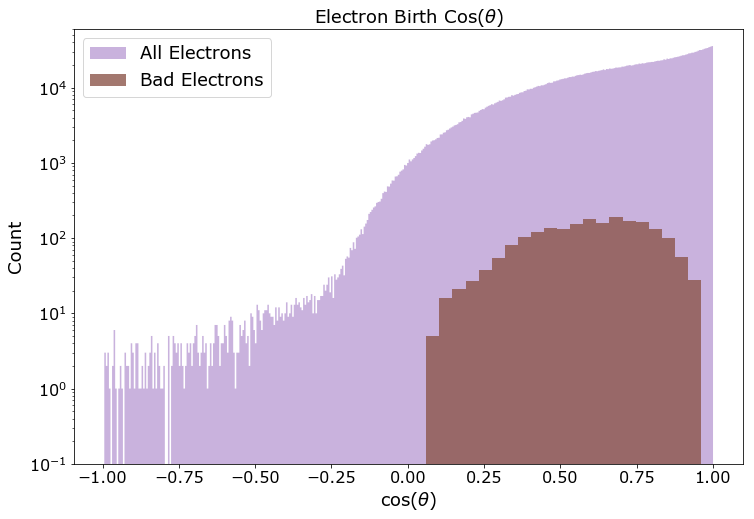

In [9]:
splt.hist(df_ntpart.query('pdg==11').pz/df_ntpart.query('pdg==11').p, label='All Electrons', log=True, color='C4')
splt.hist(df_ntpart_bad.query('pdg==11').pz/df_ntpart_bad.query('pdg==11').p, label='Bad Electrons', log=True, alpha=0.8, color='C5')
plt.title(r'Electron Birth Cos($\theta$)')
plt.xlabel(r'cos($\theta$)')
plt.ylabel('Count')
plt.legend(loc=2)
plt.savefig('plots_tmp/electron_s3_birth_cosz.pdf')

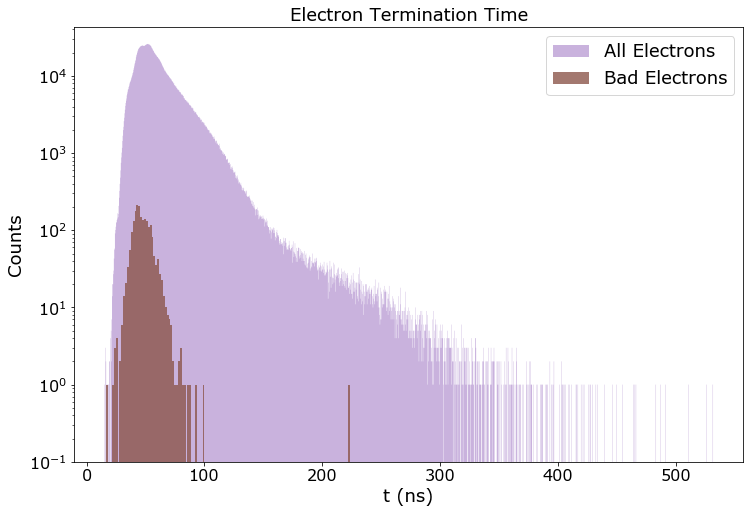

In [27]:
splt.hist(df_ntpart.query('pdg==11').tstop, label='All Electrons', log=True, color='C4')
splt.hist(df_ntpart_bad.query('pdg==11').tstop, label='Bad Electrons', log=True, alpha=0.8, color='C5')
plt.title('Electron Termination Time')
plt.xlabel('t (ns)')
plt.ylabel('Counts')
plt.legend()
plt.savefig('plots_tmp/electron_s3_tstop.pdf')

In [31]:
df_ntpart_bad.query('pdg==11').tstop.max()

223.44649

In [ ]:
splt.hist(df_ntpart.query('pdg==11').zstop, log=True)
plt.title('Electron Termination Z')
plt.xlabel('Z (mm)')

In [ ]:
splt.hist(df_ntpart.query('pdg==11').tstop, log=True)
plt.title('Electron Termination Time (not including S0 time)')
plt.xlabel('t (ns)')

In [ ]:
plt.hexbin(df_ntpart.p, df_ntpart.tstop, bins='log')
plt.colorbar()
plt.title('Electron Mom vs Stop Time')
plt.xlabel('p (MeV)')
plt.ylabel('t (ns)')

In [ ]:
plt.hexbin(df_ntpart.query('tstop>200').p, df_ntpart.query('tstop>200').tstop, bins='log')
plt.colorbar()
plt.title('Electron Mom vs Stop Time')
plt.xlabel('p (MeV)')
plt.ylabel('t (ns)')

In [ ]:
plt.hexbin(df_ntpart.p, df_ntpart.zstop, bins='log')
plt.colorbar()
plt.title('Electron Mom vs Stop Position')
plt.xlabel('p (MeV)')
plt.ylabel('Z (mm)')

In [ ]:
long_live_index = df_ntpart.query('pdg==11 and tstop>200').index

In [ ]:
df_nttvd = df_nttvd.loc[long_live_index]

In [ ]:
mu2e_plot3d_ptrap(df_ntpart.ix[0:50000],
                  'parent_z','parent_x','parent_y', x_range=[3700,17500], y_range = [-1000,1000], z_range=[-1000,1000], save_name=None,
                   df_xray=df_xray, color='parent_p', title='Muon position at stage2 start')

In [ ]:
df_ntpart.reset_index('job').loc[s2_final_index].sort_values('tstop').tail()

In [ ]:
df_pi_single_s1 = df_nttvd_s1.query('run==1 and subrun==1323 and evt==92392 and pdg<0').sort_values('time')
df_pi_single_s1.name = 'Pion'
#df_mu_single_s2e1 = df_nttvd.query('run==2 and subrun==291 and evt==8831 and job ==9076398 and pdg==13').sort_values('time')
#df_mu_single_s2e1.name = 'Muon1'
#df_e_single_s2e1 = df_nttvd.query('run==2 and subrun==291 and evt==8831 and job ==9076398 and pdg==11').sort_values('time')
#df_e_single_s2e1.name = 'Electron1'

df_mu_single_s2e1 = df_nttvd.query('run==1 and subrun==1323 and evt==92392 and job ==9076384 and pdg==13').sort_values('time')
df_mu_single_s2e1.name = 'Muon'
df_e_single_s2e1 = df_nttvd.query('run==1 and subrun==1323 and evt==92392 and job ==9076384 and pdg==11').sort_values('time')
df_e_single_s2e1.name = 'Electron'

#df_mu_single_s2e2 = df_nttvd.query('run==1 and subrun==1679 and evt==60831 and job==9075987 and pdg==13').sort_values('time')
#df_mu_single_s2e2.name = 'Muon2'
#df_e_single_s2e2 = df_nttvd.query('run==1 and subrun==1679 and evt==60831 and job==9075987 and pdg==11').sort_values('time')
#df_e_single_s2e2.name = 'Electron2'

In [ ]:
del df_nttvd
del df_nttvd_s1

In [ ]:
mu2e_plot3d_ptrap_traj([df_pi_single_s1, df_mu_single_s2e1, df_e_single_s2e1],'z','x','y',df_xray=df_xray,
                        title='Long Event', aspect='default')
#mu2e_plot3d_ptrap_traj([df_pi_single_s1, df_mu_single_s2e1, df_e_single_s2e1, df_mu_single_s2e2, df_e_single_s2e2],
#                       'z','x','y',df_xray=df_xray,
#                        title='Bad Pion Adventure', aspect='default')

In [ ]:
possible_signal_index = df_ntpart.query('pdg==11 and p>104 and zstop>11700').index

In [ ]:
cut_index = df_nttvd.loc[possible_signal_index].query('z<9200').index

In [ ]:
df_ntpart.loc[cut_index].size